##### Retail Sales Data Cleaning & Visualization

##### Project – Data Cleaning, Groupby & Visualization


In [49]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# load the datasets
sales = pd.read_csv("sales.csv")
products = pd.read_csv("products.csv")

In [51]:
# preview the datasets
sales.head()
products.head()

,product_id,category,product_name
0,P001,Electronics,Phone Charger
1,P002,Clothing,Hoodie
2,P003,Electronics,Laptop Stand
3,P004,Home,Blender
4,P005,Clothing,T-Shirt


In [52]:
# check missing values
sales.isnull().sum()
products.isnull().sum()


product_id      0
category        0
product_name    0
dtype: int64

In [53]:
# fill the products price with the corresponding price recorded in the first entry
sales['price']= sales.groupby('product_id')['price'].transform('first')

# fill the quantity with the median
sales['quantity'] = sales['quantity'].fillna(sales['quantity'].median())
sales['quantity']=sales['quantity'].astype(int)

In [54]:
# drop rows with missing product ids
sales.dropna(subset='product_id')

,order_id,product_id,date,quantity,price
0,1,P004,2024-01-15,2,300.0
1,2,P005,2024-02-14,3,500.0
2,3,P003,2024-03-05,1,500.0
3,4,P005,2024-03-29,3,500.0
4,5,P005,2024-03-11,1,500.0
...,...,...,...,...,...
95,96,P004,2024-04-22,3,300.0
96,97,P004,2024-03-02,1,300.0
97,98,P005,2024-02-21,1,500.0
98,99,P001,2024-01-12,4,300.0


In [55]:
# check the dataset now
sales.isnull().sum()
products.isnull().sum()

product_id      0
category        0
product_name    0
dtype: int64

In [56]:
# merge the datasets
df = pd.merge(sales,products,on='product_id',how='left')

In [57]:
df.head()

,order_id,product_id,date,quantity,price,category,product_name
0,1,P004,2024-01-15,2,300.0,Home,Blender
1,2,P005,2024-02-14,3,500.0,Clothing,T-Shirt
2,3,P003,2024-03-05,1,500.0,Electronics,Laptop Stand
3,4,P005,2024-03-29,3,500.0,Clothing,T-Shirt
4,5,P005,2024-03-11,1,500.0,Clothing,T-Shirt


In [58]:
# feature engineering
df['date'] = pd.to_datetime(df['date'],errors='coerce')
df['month']  =df['date'].dt.to_period('M')
df['sales_amount'] = df['quantity'] * df['price']

In [59]:
# explore the dataframe
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      100 non-null    int64         
 1   product_id    100 non-null    object        
 2   date          100 non-null    datetime64[ns]
 3   quantity      100 non-null    int64         
 4   price         100 non-null    float64       
 5   category      100 non-null    object        
 6   product_name  100 non-null    object        
 7   month         100 non-null    period[M]     
 8   sales_amount  100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3), period[M](1)
memory usage: 7.2+ KB


(100, 9)

#### Exploratory Analysis


In [60]:
# aggregate : Sales by month and category
monthly_sales = df.groupby('month')['sales_amount'].sum().reset_index()
category_sales = df.groupby('category')['sales_amount'].sum().reset_index()



In [42]:
monthly_sales

,month,sales_amount
0,2024-01,15900.0
1,2024-02,12000.0
2,2024-03,15800.0
3,2024-04,16800.0
4,2024-05,18100.0
5,2024-06,13600.0


In [61]:
# visualize
sns.set_theme(style='whitegrid')


In [65]:
monthly_sales['month'].dtype

dtype('<M8[ns]')

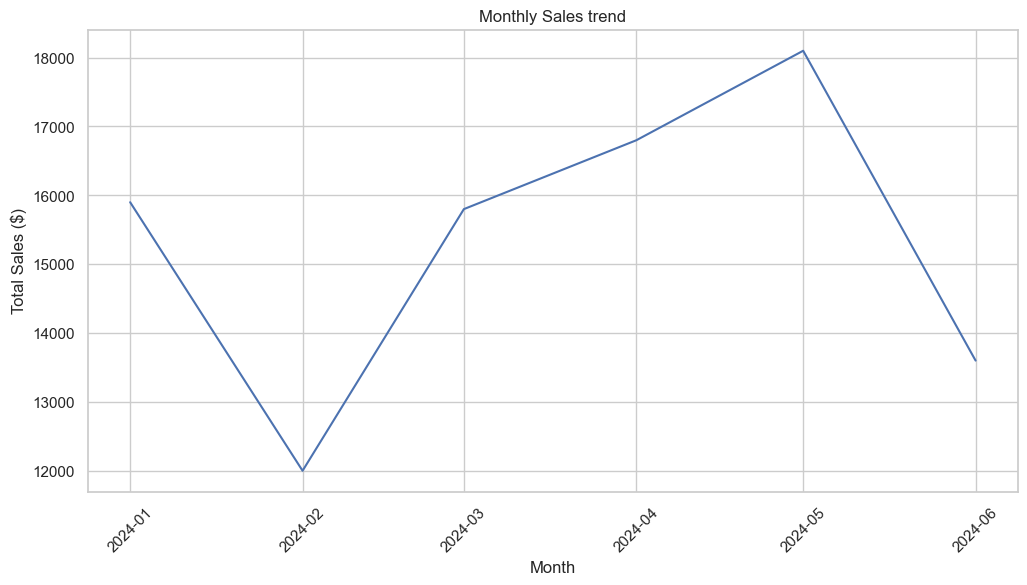

In [67]:
# monthly sales trend
plt.figure(figsize=(12,6))
# convert the month column from period to datetime
monthly_sales['month'] =monthly_sales['month'].astype('datetime64[ns]')

# plot
sns.lineplot(monthly_sales,x='month', y='sales_amount',markers='o')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title("Monthly Sales trend")
plt.xticks(rotation=45)
plt.show()           



Text(0, 0.5, 'Total Sales ($)')

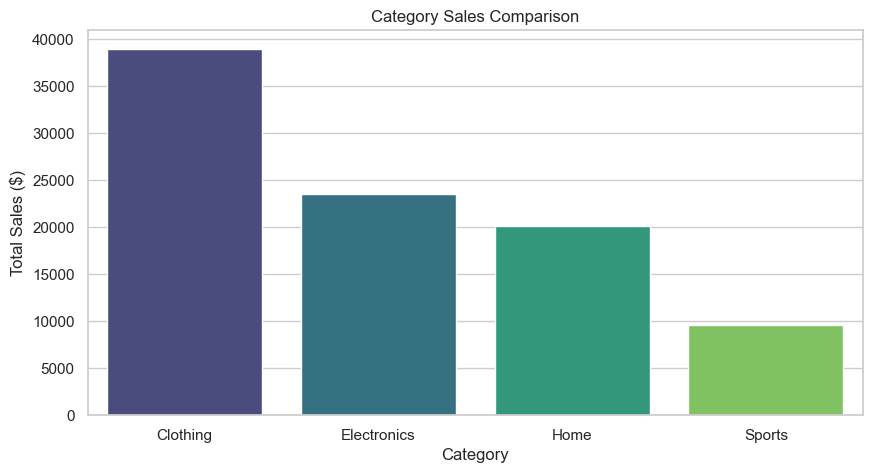

In [72]:
# category sales comparison
plt.figure(figsize=(10,5))
sns.barplot(data =category_sales,x='category',y='sales_amount',palette='viridis',hue='category')
plt.title("Category Sales Comparison")
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")

Text(0.5, 0, 'Total Sales ($)')

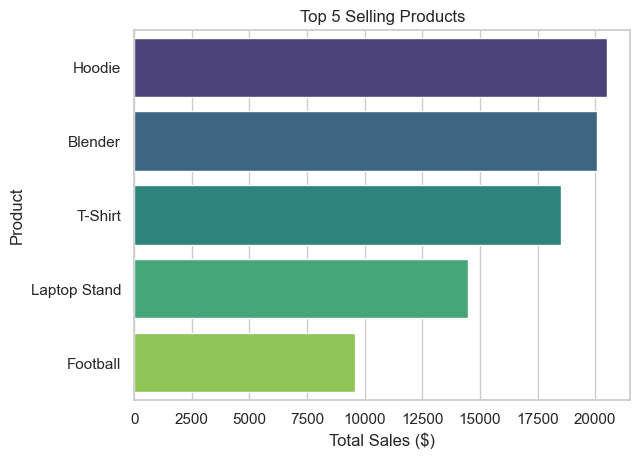

In [78]:
# Top 5 products
top_products = df.groupby('product_name')['sales_amount'].sum().nlargest(5).reset_index()
top_products

# plot
sns.barplot(top_products,x= "sales_amount",y='product_name',palette='viridis',hue='product_name')
plt.title("Top 5 Selling Products")
plt.ylabel("Product")
plt.xlabel("Total Sales ($)")

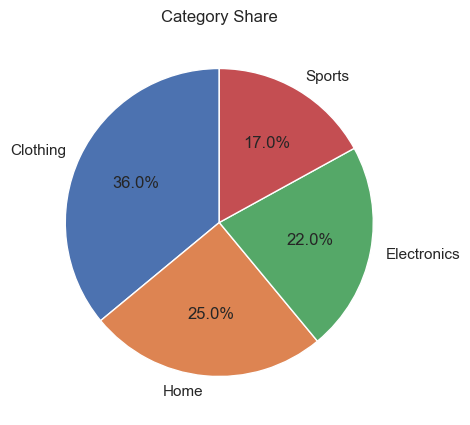

In [79]:
# pie chart by category share
category_share = df['category'].value_counts(normalize=True) * 100
plt.figure(figsize=(10,5))
plt.pie(category_share,labels=category_share.index,autopct='%1.1f%%',startangle=90)
plt.title("Category Share")
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

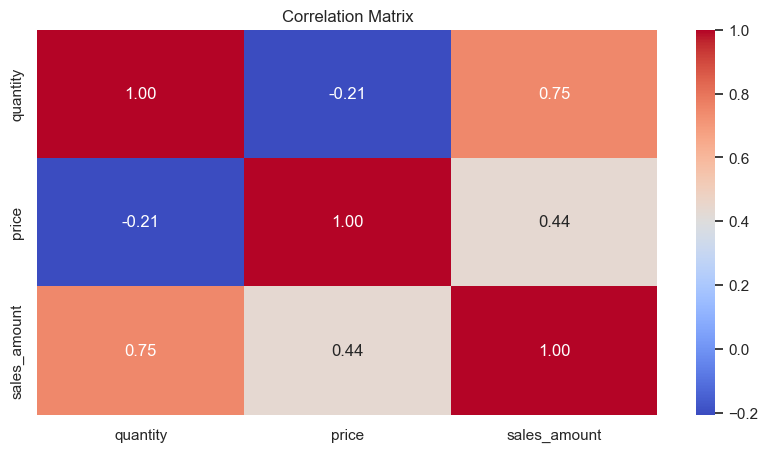

In [80]:
# heatmap
correlation_matrix = df[['quantity','price','sales_amount']].corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Boxplot of Sales by Category')

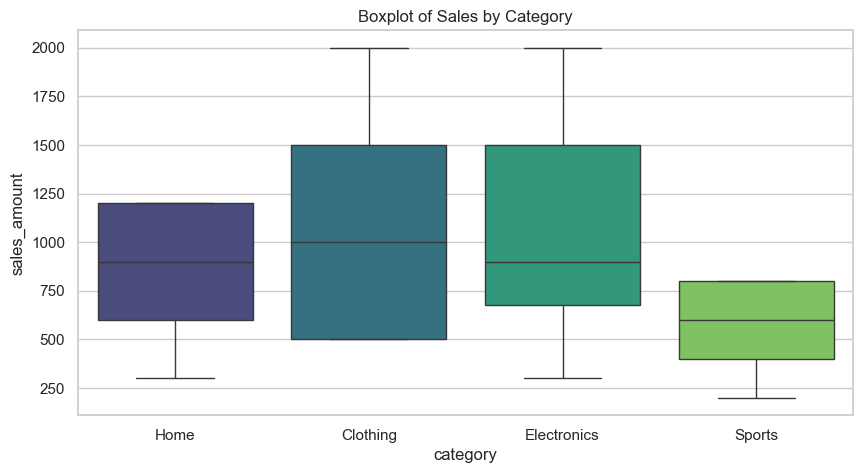

In [82]:
# boxplot fro outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='category',y='sales_amount',palette='viridis',hue='category')
plt.title("Boxplot of Sales by Category")

#### The end

- thank you masila
